In [68]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# import data

floor1_2018 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2018Floor1.csv')
floor2_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor2.csv")
floor3_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor3.csv")
floor4_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor4.csv")
floor5_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor5.csv")
floor6_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor6.csv")
floor7_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor7.csv")

floor1_2019 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2019Floor1.csv')
floor2_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor2.csv")
floor3_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor3.csv")
floor4_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor4.csv")
floor5_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor5.csv")
floor6_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor6.csv")
floor7_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor7.csv")

meteo = pd.read_csv('C:/Ironhack/Week5-Project/meteorological_data_bangkok_2018_2019.csv')

In [3]:
# merge 2018 and 2019 data from each floor

floor1= pd.concat([floor1_2018,floor1_2019], axis=0)
floor2= pd.concat([floor2_2018,floor2_2019], axis=0)
floor3= pd.concat([floor3_2018,floor3_2019], axis=0)
floor4= pd.concat([floor4_2018,floor4_2019], axis=0)
floor5= pd.concat([floor5_2018,floor5_2019], axis=0)
floor6= pd.concat([floor6_2018,floor6_2019], axis=0)
floor7= pd.concat([floor7_2018,floor7_2019], axis=0)

In [4]:
# changing the date column from object to datetime and separating time, day, month and year

# List of DataFrames
dataframes = [floor1, floor2, floor3, floor4, floor5, floor6, floor7]

# Iterate through each DataFrame
for df in dataframes:
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Create new columns for day, month, year, and time
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Month'] = df['Date'].dt.strftime('%B')  
    df['Year'] = df['Date'].dt.year
    df['Time'] = df['Date'].dt.time
    df['Hour'] = df['Date'].dt.hour

In [5]:
# adding the energy consumption of every zone for each variable 

for df in dataframes:
    columns_to_drop = df.filter(like='Light(kW)').columns.tolist() + \
                  df.filter(like='AC').columns.tolist() + \
                  df.filter(like='Plug(kW)').columns.tolist() + \
                  df.filter(like='(degC)').columns.tolist() + \
                  df.filter(like='(RH%)').columns.tolist() + \
                  df.filter(like='(lux)').columns.tolist() 
    

    df['total_light(kW)'] = df.filter(like='Light(kW)').sum(axis=1)
    df['total_ac(kW)'] = df.filter(like='AC').sum(axis=1)
    df['total_plug(kW)'] = df.filter(like='Plug(kW)').sum(axis=1)
    df['avg_temp(degC)'] = df.filter(like='(degC)').mean(axis=1)
    df['avg_rel_humidity(%)'] = df.filter(like='(RH%)').mean(axis=1)
    
    
    # Drop the columns
    df.drop(columns=columns_to_drop, inplace=True)

In [6]:
# Merge floor dtaframes using right join

building = pd.merge(dataframes[0], dataframes[1], on=['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)', 'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)', 'avg_rel_humidity(%)'], how='right')

# Iterate through the rest of the DataFrames and merge
for df in dataframes[2:]:
    building = pd.merge(building, df, on=['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)', 'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)', 'avg_rel_humidity(%)'], how='right')

In [7]:
building

,Date,Day,Month,Year,Time,Hour,total_light(kW),total_ac(kW),total_plug(kW),avg_temp(degC),avg_rel_humidity(%)
0,2018-07-01 00:00:00,1,July,2018,00:00:00,0,0.23,0.01,0.23,28.7825,65.6350
1,2018-07-01 00:01:00,1,July,2018,00:01:00,0,0.20,0.01,0.20,28.7525,65.6375
2,2018-07-01 00:02:00,1,July,2018,00:02:00,0,0.23,0.01,0.28,28.7525,65.6450
3,2018-07-01 00:03:00,1,July,2018,00:03:00,0,0.27,0.01,0.34,28.7525,65.6475
4,2018-07-01 00:04:00,1,July,2018,00:04:00,0,0.24,0.01,0.33,28.7775,65.6600
...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,31,December,2019,23:55:00,23,0.03,0.01,0.36,28.6850,54.3800
790556,2019-12-31 23:56:00,31,December,2019,23:56:00,23,0.03,0.01,0.36,28.6825,54.3750
790557,2019-12-31 23:57:00,31,December,2019,23:57:00,23,0.03,0.01,0.36,28.6825,54.3875
790558,2019-12-31 23:58:00,31,December,2019,23:58:00,23,0.03,0.01,0.36,28.6750,54.4225


In [8]:
# check that the new building data frame has the same number of rows as the floors
for df in dataframes:
    print(df.shape)

(790560, 11)
(790560, 11)
(790560, 11)
(790560, 11)
(790560, 11)
(689128, 11)
(790560, 11)


Checking for NaN values

In [9]:
building.dtypes

Date                   datetime64[ns]
Day                             int64
Month                          object
Year                            int64
Time                           object
Hour                            int64
total_light(kW)               float64
total_ac(kW)                  float64
total_plug(kW)                float64
avg_temp(degC)                float64
avg_rel_humidity(%)           float64
dtype: object

In [10]:
building.isna().sum()

Date                        0
Day                         0
Month                       0
Year                        0
Time                        0
Hour                        0
total_light(kW)             0
total_ac(kW)                0
total_plug(kW)              0
avg_temp(degC)         249477
avg_rel_humidity(%)    249477
dtype: int64

In [11]:
# using interpolation to fill in NaN values
columns_to_interpolate = ['avg_temp(degC)','avg_rel_humidity(%)']
building[columns_to_interpolate] = building[columns_to_interpolate].interpolate()

Interpolation is used in order to maintain the data structure. In this case we are dealing with a time series and it is appropiate to maintain continuity. Interpolation is also helpful in maintaining trends.

In [12]:
building_avg_by_hour = building.groupby(['Year', 'Month', 'Day', 'Hour']).mean()
building_avg_by_hour

total_light(kW)  total_ac(kW)  total_plug(kW)  \
Year Month     Day Hour                                                  
2018 August    1   0            0.102833      0.010000        0.279333   
                   1            0.090167      0.010000        0.282833   
                   2            0.118667      0.010000        0.282000   
                   3            0.102833      0.010000        0.281167   
                   4            0.157167      0.010000        0.277667   
...                                  ...           ...             ...   
2019 September 30  19          11.659500      0.141000        0.965667   
                   20           5.570500      0.029833        0.607167   
                   21           0.252333      0.000000        0.506333   
                   22           0.077167      0.000000        0.509833   
                   23           0.072333      0.000000        0.511167   

                         avg_temp(degC)  avg_rel_humidity(%)  
Year Month     Day Hour                                       
2018 August    1   0          28.853347            59.987431  
                   1          28.886028            60.327694  
                   2          28.809569            60.623875  
                   3          28.876583            60.928903  
                   4          28.949875            61.204167  
...                                 ...                  ...  
2019 September 30  19         27.035208            66.267708  
                   20         27.575000            67.112625  
                   21         27.397500            67.881875  
                   22         27.330583            69.477208  
                   23         27.376778            71.232764  

[13176 rows x 5 columns]

## Metereological Data cleaning

In [13]:
# visualise table contents
meteo

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
1,1,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T00:00:00,25.2,25.2,19.2,69.37,0,0,NaN,...,1013,27.1,10,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
2,2,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T01:00:00,25.4,25.4,20.1,72.44,0,0,NaN,...,1011.6,33.9,8.6,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
3,3,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T02:00:00,24.2,24.2,18.5,70.28,0,0,NaN,...,1012,27.1,10,21,0.1,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
4,4,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T03:00:00,24,24,18.5,71.35,0,0,NaN,...,1011,27.1,10,53,0.2,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,17516,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T19:00:00,30.8,35.1,22.9,63.07,0,0,NaN,...,1013.3,16.5,10,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."
17517,17517,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T20:00:00,29.7,32.1,20.7,58.52,0,0,NaN,...,1015,95.7,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17518,17518,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T21:00:00,29.5,31.9,21,60.3,0,0,NaN,...,1015,91.8,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17519,17519,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T22:00:00,27.8,31,22.9,74.71,0,0,NaN,...,1015.4,14.5,9.8,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."


In [14]:
# replace header column with second row of original table to get appropiate header names
new_header = meteo.iloc[0]
meteo = meteo[1:] 
meteo.columns = new_header 

Dealing with NaN values

In [15]:
# check for NaN values 
meteo.isnull().sum()

0
0                       0
name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          16401
snow                17520
snowdepth           17520
windgust            17163
windspeed               0
winddir                 0
sealevelpressure       83
cloudcover              0
visibility              6
solarradiation          0
solarenergy             0
uvindex                 0
severerisk          17520
conditions              0
icon                    0
stations                0
dtype: int64

In [16]:
# the columns for snow, snowdepth and windgust are mostly or fully empty and wil be dropped. 
meteo = meteo.drop(columns = ['name','snow','snowdepth','windgust', 'severerisk', 'stations'])

In [17]:
# delete first column with duplcated index names
meteo = meteo.drop(meteo.columns[0],axis=1)

In [18]:
# check for data types
meteo.dtypes

0
datetime            object
temp                object
feelslike           object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
visibility          object
solarradiation      object
solarenergy         object
uvindex             object
conditions          object
icon                object
dtype: object

In [19]:
# for precip type we assume that the nan values mean that there has been no rain, therefore th nan values will be replaced with no precipitation
meteo['preciptype'].fillna('No Precipitation', inplace=True)

In [20]:
# changing numerical columns from strings to float 
object_to_int_cols = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'cloudcover']
meteo[object_to_int_cols] = meteo[object_to_int_cols].astype(float)


In [21]:
# for the sea level pressure, the NaN values will be replaced with the monthly average pressure

# chaning date column into datetime form and adding columns for the time, day, month and year
meteo['datetime'] = pd.to_datetime(meteo['datetime'])
meteo['Day'] = meteo['datetime'].dt.day
meteo['Month'] = meteo['datetime'].dt.strftime('%B')  
meteo['Year'] = meteo['datetime'].dt.year
meteo['Time'] = meteo['datetime'].dt.time
meteo['Hour'] = meteo['datetime'].dt.hour

average_pressure = meteo.groupby('Month')['sealevelpressure'].mean()
meteo['sealevelpressure'] = meteo.apply(
    lambda row: average_pressure[row['Month']] if pd.isna(row['sealevelpressure']) else row['sealevelpressure'],
    axis=1)

In [22]:
# replacing visibility nan values with the average value for visibility for its respective condition 
visibility = meteo.groupby('conditions')['visibility'].mean()
meteo['visibility'] = meteo.apply(
    lambda row: visibility[row['conditions']] if pd.isna(row['visibility']) else row['visibility'],
    axis=1)

other data formatting

In [23]:
# changing wind direction into a cartegorical value

# Define the bins and labels
bins = [-22.5, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Use pd.cut to convert numerical to categorical
meteo['wind_direction'] = pd.cut(meteo['winddir'], bins=bins, labels=labels, include_lowest=True, right=False)

In [24]:
# merging the building and metereological data

building_meteo = pd.merge(building, meteo, on=['Year', 'Month', 'Day', 'Hour','Time'], how='right')


In [25]:
building_meteo.isnull().sum()

Date                   4344
Day                       0
Month                     0
Year                      0
Time                      0
Hour                      0
total_light(kW)        4344
total_ac(kW)           4344
total_plug(kW)         4344
avg_temp(degC)         4344
avg_rel_humidity(%)    4344
datetime                  0
temp                      0
feelslike                 0
dew                       0
humidity                  0
precip                    0
precipprob                0
preciptype                0
windspeed                 0
winddir                   0
sealevelpressure          0
cloudcover                0
visibility                0
solarradiation            0
solarenergy               0
uvindex                   0
conditions                0
icon                      0
wind_direction          832
dtype: int64

In [26]:
# the sensor data starts reading from the 1st of july 2018 whereas the metereological data strats from 1st january 2018
# therefore any NaN Values for the measured energy will be dropped and our data will include the peroods from july 2018 to december 2019
building_meteo= building_meteo.dropna(axis=0)

correlation between variables

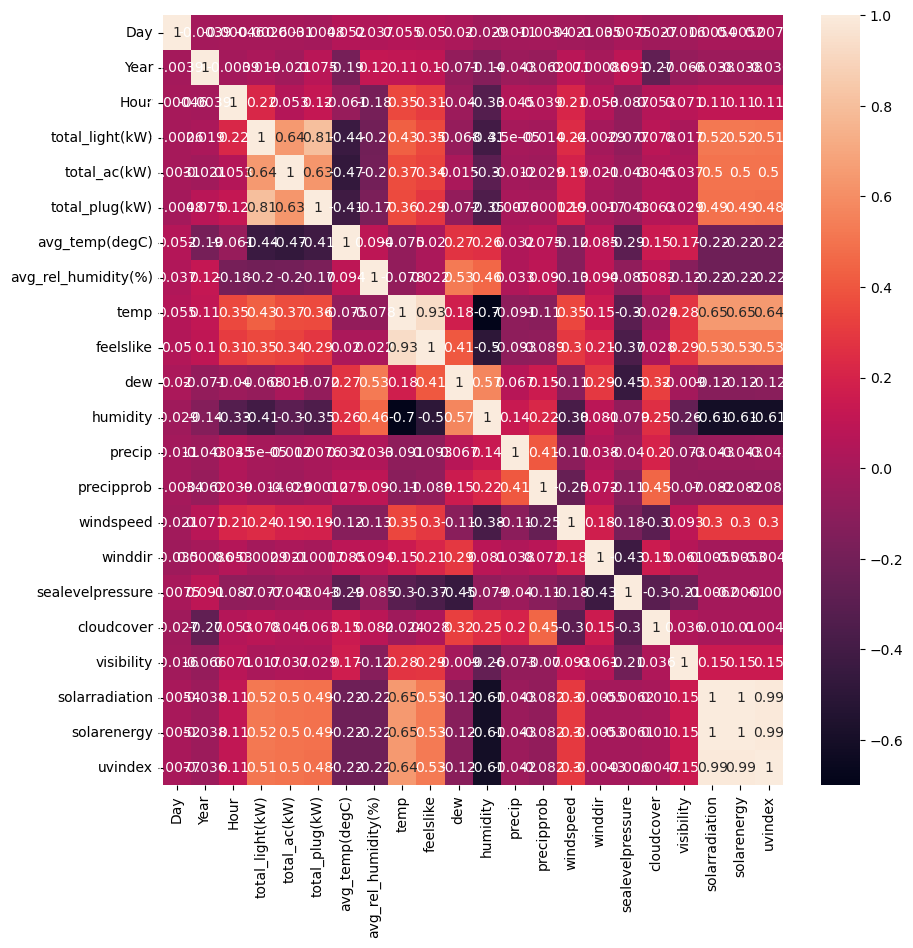

In [27]:
#creating a correlation heatmap
fig, ax=plt.subplots(figsize=(10,10))
corr=building_meteo.corr()
ax=sns.heatmap(corr, annot=True)
plt.show()

In [28]:
building_meteo.dtypes

Date                   datetime64[ns]
Day                             int64
Month                          object
Year                            int64
Time                           object
Hour                            int64
total_light(kW)               float64
total_ac(kW)                  float64
total_plug(kW)                float64
avg_temp(degC)                float64
avg_rel_humidity(%)           float64
datetime               datetime64[ns]
temp                          float64
feelslike                     float64
dew                           float64
humidity                      float64
precip                        float64
precipprob                    float64
preciptype                     object
windspeed                     float64
winddir                       float64
sealevelpressure              float64
cloudcover                    float64
visibility                    float64
solarradiation                float64
solarenergy                   float64
uvindex     

Seasonal Variation:

In [29]:
years_to_average = [2018, 2019]

two_years_data = building_meteo[building_meteo['Year'].isin(years_to_average)]

# Group by month and calculate the mean for each month
monthly_average_between_two_years = two_years_data.groupby('Month').mean().reset_index()

In [30]:
wetseason=['July','August','September','October']
coolseason=['November','December','January','February']
hotseason=['March','April','May','June']

wetseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(wetseason)]
coolseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(coolseason)]
hotseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(hotseason)]

In [31]:
overall_mean_wetseason = wetseason_floor1.mean()
overall_mean_coolseason =coolseason_floor1.mean()
overall_mean_hotseason =hotseason_floor1.mean()

C:\Users\usuario\AppData\Local\Temp\ipykernel_30460\2851934193.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_wetseason = wetseason_floor1.mean()
C:\Users\usuario\AppData\Local\Temp\ipykernel_30460\2851934193.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_coolseason =coolseason_floor1.mean()
C:\Users\usuario\AppData\Local\Temp\ipykernel_30460\2851934193.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_hotseason =hotseason_floor1.mean(

In [32]:
overall_mean_wetseason=pd.DataFrame(overall_mean_wetseason).T
overall_mean_wetseason['season']='wet'

overall_mean_coolseason=pd.DataFrame(overall_mean_coolseason).T
overall_mean_coolseason['season']='cool'

overall_mean_hotseason=pd.DataFrame(overall_mean_hotseason).T
overall_mean_hotseason['season']='hot'

In [33]:
seasonal_averages= pd.concat([overall_mean_wetseason,overall_mean_coolseason,overall_mean_hotseason], axis=0)
seasonal_averages

,Day,Year,Hour,total_light(kW),total_ac(kW),total_plug(kW),avg_temp(degC),avg_rel_humidity(%),temp,feelslike,...,precipprob,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,season
0,15.829812,2018.499547,11.552615,6.061529,22.958568,0.757542,25.998043,66.542839,29.023556,33.131003,...,10.591505,8.871268,187.634769,1008.010203,55.851770,9.593449,120.342949,0.432954,1.188439,wet
0,15.608368,2018.762955,11.464797,5.347960,16.063602,0.643314,22.915462,65.481326,28.554900,31.141226,...,1.229123,7.903488,129.821159,1012.219283,34.514102,8.979643,115.108844,0.413731,1.141229,cool
0,15.738820,2019.000000,11.525293,5.579575,24.597996,0.655837,25.927861,68.372673,30.812075,36.886705,...,5.266899,10.130885,190.273647,1008.058825,41.280961,9.533624,128.736010,0.462997,1.277203,hot


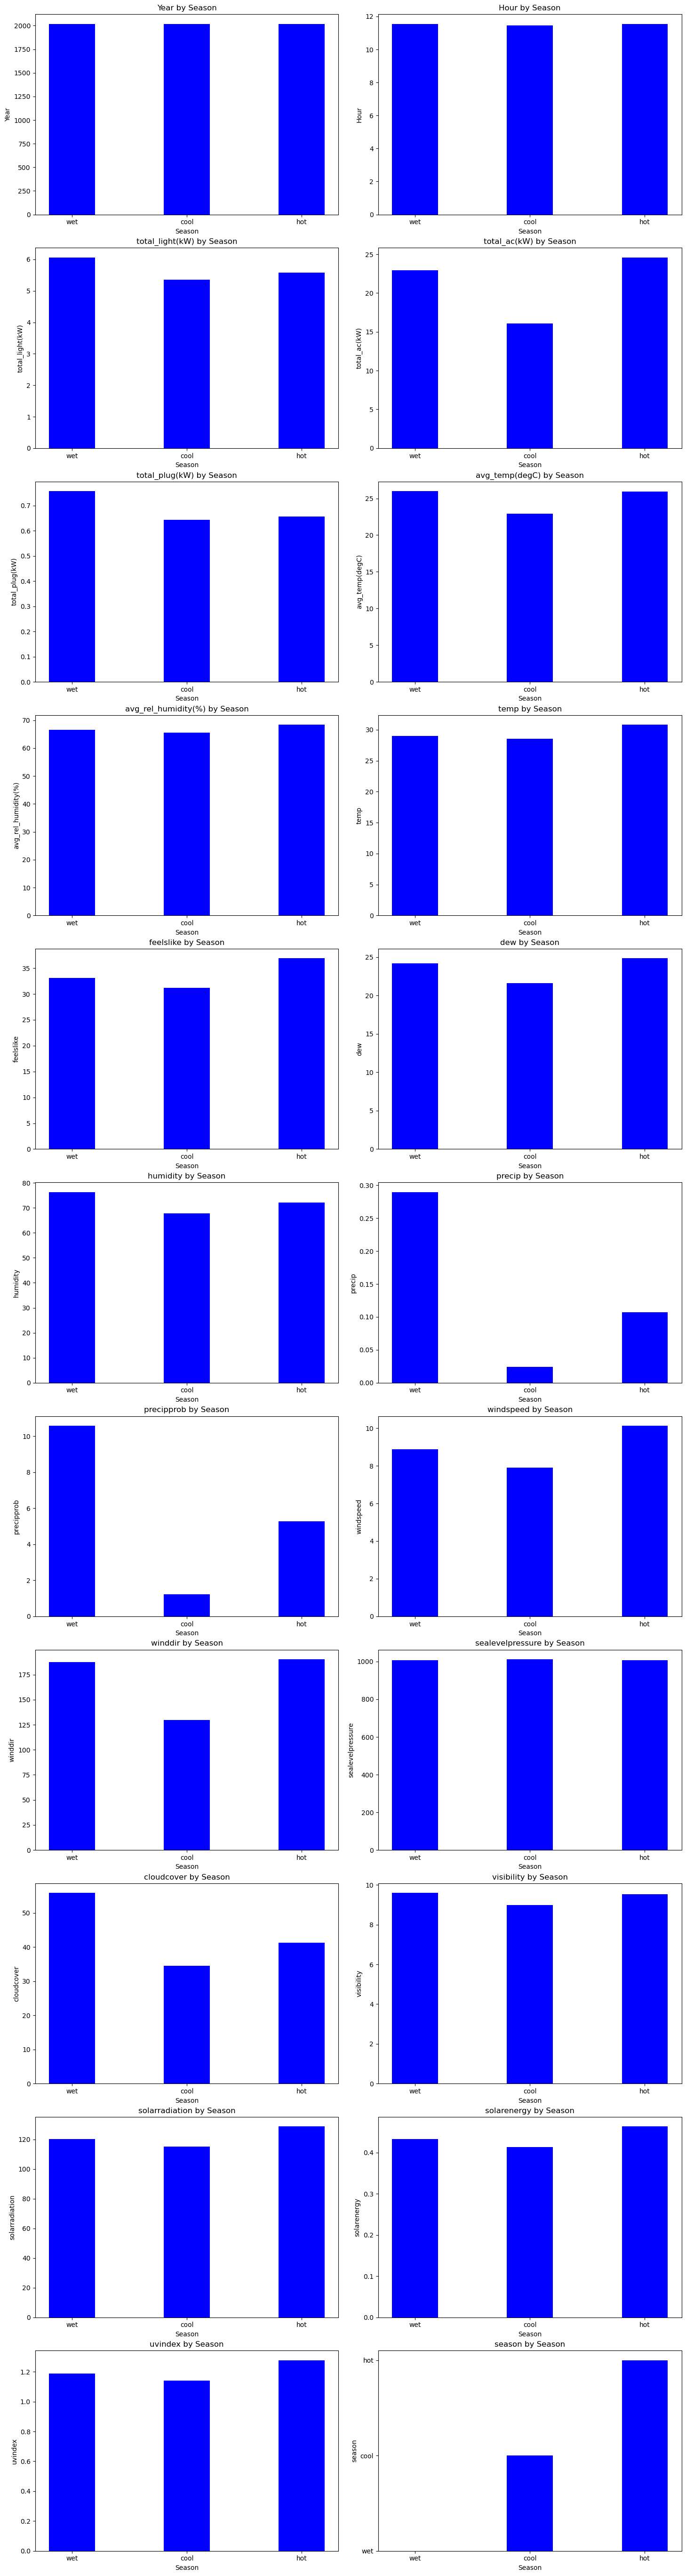

In [34]:
import matplotlib.pyplot as plt
import math

# Get the number of columns in the DataFrame
num_columns = len(seasonal_averages.columns) - 1  # Exclude 'season' column

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(num_columns / 2)  # You can adjust the number of columns per row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=3.0)  # Adjust the padding between subplots

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate over each column (excluding 'season')
for i, col in enumerate(seasonal_averages.columns[1:]):
    # creating the bar plot
    axes[i].bar(seasonal_averages['season'], seasonal_averages[col], color='blue', width=0.4)
    
    axes[i].set_xlabel("Season")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} by Season")

# Hide any remaining empty subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

plt.show()


Variation of energy consumption with rain

In [35]:
building_meteo.columns

Index(['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)',
       'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)',
       'avg_rel_humidity(%)', 'datetime', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'icon',
       'wind_direction'],
      dtype='object')

In [36]:
# # time series plot
# plt.plot(building_avg_by_hour.index, building_avg_by_hour['total_light(kW)'])

## Modelling

In [52]:
# a function is defined to process, test and tran differenf datasets so that several targest can be assesed.

def preprocess_data(X, y):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    Xtrain=pd.DataFrame(X_train)
    Xtest=pd.DataFrame(X_test)

    # separating numerical data from train and test data
    numericals_train = X_train.select_dtypes(np.number)
    numericals_test = X_test.select_dtypes(np.number)
    numericals_train.head()

    # scaling numerical values using standard scaler
    transformer = StandardScaler().fit(numericals_train)
    numericals_train_standardized = transformer.transform(numericals_train)
    numericals_test_standardized = transformer.transform(numericals_test)

    # converting array into dataframe 
    numericals_test_standardized= pd.DataFrame(numericals_test_standardized).reset_index(drop=True)
    numericals_train_standardized= pd.DataFrame(numericals_train_standardized).reset_index(drop=True)

    # separating categorical variabes
    categoricals_train= X_train.select_dtypes(object)
    categoricals_test= X_test.select_dtypes(object)
    categoricals_train.head()

    #  encoding categorical variables using onehot encoder
    from sklearn.preprocessing import OneHotEncoder

    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore').fit(categoricals_train)

    # Encode categorical features for both the training and test datasets
    categorical_train = encoder.transform(categoricals_train).toarray()
    categorical_test = encoder.transform(categoricals_test).toarray()

    #  encoding categorical variables using onehot encoder
    from sklearn.preprocessing import OneHotEncoder

    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore').fit(categoricals_train)

    # Encode categorical features for both the training and test datasets
    categorical_train = encoder.transform(categoricals_train).toarray()
    categorical_test = encoder.transform(categoricals_test).toarray()
    
    categorical_train=pd.DataFrame(categorical_train)
    categorical_test=pd.DataFrame(categorical_test)

    X_train=pd.concat([numericals_train_standardized ,categorical_train], axis=1)
    X_test=pd.concat([numericals_test_standardized ,categorical_test], axis=1)

    return X_train, X_test, y_train, y_test


In [74]:
def modelauto( models, X_tr, y_tr,X_te,y_te):
    for model in models:
        model.fit(X_tr,y_tr)
        print(f"{model.__class__.__name__}: Train ->{model.score(X_tr,y_tr)}, Test ->{model.score(X_te,y_te)}")

In [75]:
targets= ('total_light(kW)','total_ac(kW)', 'total_plug(kW)')

X = building_meteo.drop(['total_light(kW)'],axis=1)
y = building_meteo['total_light(kW)']
X_train, X_test, y_train, y_test = preprocess_data(X, y)
modelauto(modellist, X_train,y_train,X_test,y_test)

LinearRegression: Train ->0.8051883444738079, Test ->0.8020399652983661
KNeighborsRegressor: Train ->0.8880393235897641, Test ->0.7762554250746786


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train ->0.9357224939667942, Test ->0.8960001733044175
DecisionTreeRegressor: Train ->1.0, Test ->0.8430472110925029
RandomForestRegressor: Train ->0.9887915912065344, Test ->0.9198985859870858


For the total light energy consumption, the best model is the random forest regressor with scores of Train ->0.9887915912065344, Test ->0.9198985859870858

In [72]:
X = building_meteo.drop(['total_ac(kW)'],axis=1)
y = building_meteo['total_ac(kW)']

X_train, X_test, y_train, y_test = preprocess_data(X, y)
modelauto(modellist, X_train,y_train,X_test,y_test)

LinearRegression: Train ->0.7770655269060991, Test ->0.7835118036382294
KNeighborsRegressor: Train ->0.9185495930489942, Test ->0.8313765540837896


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train ->0.9528918407486211, Test ->0.9473668435620426
DecisionTreeRegressor: Train ->1.0, Test ->0.9003727797537557
RandomForestRegressor: Train ->0.9920793419141806, Test ->0.9511545856952694


In [73]:
X = building_meteo.drop(['total_plug(kW)'],axis=1)
y = building_meteo['total_plug(kW)']

X_train, X_test, y_train, y_test = preprocess_data(X, y)
modelauto(modellist, X_train,y_train,X_test,y_test)

LinearRegression: Train ->0.7181758102844606, Test ->0.7273101840176757
KNeighborsRegressor: Train ->0.8174867260461426, Test ->0.6417383161908395


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train ->0.8627761184487265, Test ->0.6815526059208628
DecisionTreeRegressor: Train ->1.0, Test ->0.5239487425753333
RandomForestRegressor: Train ->0.9644830579904707, Test ->0.7601535515265727


## Hypothesis Testing

We want to test whether our targets (light, AC and plug energy consumption) are influenced by the presence of rain. To do this, we set up a two-sided hypothesis testing. In this case, a two-sided test is appropriate because we are interested in whether the mean electricity consumption is different for rainy and non-rainy days, without specifying a direction of the difference. A two-sided test allows us to detect differences in either direction (greater or smaller), providing a more comprehensive assessment of the impact of rain on electricity consumption."

In [145]:
from scipy.stats import ttest_ind

# Define your null hypothesis (H0) and alternative hypothesis (H1)
# H0: The mean electricity consumption for light is the same for rainy and non-rainy days.
# H1: The mean electricity consumption for light is different for rainy and non-rainy days.

rainy_days = building_meteo[building_meteo['preciptype'] == 'rain']['total_light(kW)']
non_rainy_days = building_meteo[building_meteo['preciptype'] == 'No Precipitation']['total_light(kW)']

# Perform a two-sample t-test
stat, pval = ttest_ind(rainy_days, non_rainy_days, equal_var=False)  # Assuming variances are not equal

# Print the results
print('Test Statistic:', stat)
print('P-value for the two-sample t-test:', pval)

# Compare the p-value to the significance level (alpha)
alpha = 0.05
if pval < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the mean light consumption is different for rainy and non-rainy days.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the mean light consumption for rainy and non-rainy days.")

Test Statistic: -1.5991432980905025
P-value for the two-sample t-test: 0.11013323483155026
Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the mean electricity consumption for rainy and non-rainy days.


In [147]:
from scipy.stats import ttest_ind

# Define your null hypothesis (H0) and alternative hypothesis (H1)
# H0: The mean electricity consumption for air conditioning is the same for rainy and non-rainy days.
# H1: The mean electricity consumption for air conditioning is different for rainy and non-rainy days.


rainy_days = building_meteo[building_meteo['preciptype'] == 'rain']['total_ac(kW)']
non_rainy_days = building_meteo[building_meteo['preciptype'] == 'No Precipitation']['total_ac(kW)']

# Perform a two-sample t-test
stat, pval = ttest_ind(rainy_days, non_rainy_days, equal_var=False)  # Assuming variances are not equal

# Print the results
print('Test Statistic:', stat)
print('P-value for the two-sample t-test:', pval)

# Compare the p-value to the significance level (alpha)
alpha = 0.05
if pval < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the mean AC consumption is different for rainy and non-rainy days.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the mean AC consumption for rainy and non-rainy days.")

Test Statistic: -3.8331886337115364
P-value for the two-sample t-test: 0.00013458611543635176
Reject the null hypothesis. There is enough evidence to suggest that the mean AC consumption is different for rainy and non-rainy days.


In [ ]:
from scipy.stats import ttest_ind

# Define your null hypothesis (H0) and alternative hypothesis (H1)
# H0: The mean electricity consumption for plugs is the same for rainy and non-rainy days.
# H1: The mean electricity consumption for plugs is different for rainy and non-rainy days.

rainy_days = building_meteo[building_meteo['preciptype'] == 'rain']['total_plug(kW)']
non_rainy_days = building_meteo[building_meteo['preciptype'] == 'No Precipitation']['total_plug(kW)']

# Perform a two-sample t-test
stat, pval = ttest_ind(rainy_days, non_rainy_days, equal_var=False)  # Assuming variances are not equal

# Print the results
print('Test Statistic:', stat)
print('P-value for the two-sample t-test:', pval)

# Compare the p-value to the significance level (alpha)
alpha = 0.05
if pval < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest that the mean plug energy consumption is different for rainy and non-rainy days.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in the mean plug energy consumption for rainy and non-rainy days.")


In [ ]:
# save clean used files
building_meteo.to_csv('building_meteo2.csv', index=False)

In [ ]:
# save clean used files

seasonal_averages.to_csv('seasonal_averages.csv', index=False)